<h1><center> EDA for Automobile using Python</center></h1>
<b> Name            : Nilesh A Bodhe</b> <br>
<b> Email           : nabodhe@yahoo.com</b> <br>
<b> Data Source     : Automobile.csv from git </b> <br>
<b> Submission Date : 21-Sept-2019</b> <br>
<b> Mentor Name : Suchit Mujumdar</b>


### Problem Statement
Automobile data set has several columns that represents automobile specification.
1. Assigned insurance risk.
2. Normalized losses
3. Specification of automobile in terms of various characteristics.

<b><u>Objective:</u></b>
<p>To study correlation of various factors that are represented by <br> 
   columns in data set such as Make, Normalized losses, City Mpg etc.</p>

<b><u>Technology Stack:</u></b><br>
<p> Basic Python 3.6 <br>
    Compatible Numpy, Pandas, Matplotlib, Seaborn packages </p>
<p> Git hub link : https://raw.githubusercontent.com/nabodhe/DATASCIENCE/master/Data/Projects/Automobile_data.csv </p>

### Load packages

In [1]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib as plt 
import seaborn as sns 

### Check pandas verison

In [2]:
pd.__version__

'0.25.0'

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/nabodhe/DATASCIENCE/master/Data/Projects/Automobile_data.csv')
df.head(10)
df.round(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


## Observations & Exceptions about data 
There are some rows which contain special character '?' that represents <br>missing value for that particular specification of automobile.<br><p>
This should be replaced to null.
As we can observe most of column data type is object, <br>hence we need to clean data, update data type appropriately.

In [111]:
print('Info %s' % df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [113]:
'''
find out data issue for normalized losses.
''' 
df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()

41

In [114]:
lstColumns = list(df.columns)
lstColumns

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

## Set graph package and Environment

In [79]:
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
#import warnings
#warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [80]:
import matplotlib.pyplot as plt
#%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [81]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

### Plot graph for column num-of-doors
#### As frequnecy of num-of-doors is maximum, <br>Hence mode is used for missing value.

<class 'pandas.core.series.Series'>
num-of-doors
?       2  
four    114
two     89 
Name: make, dtype: int64


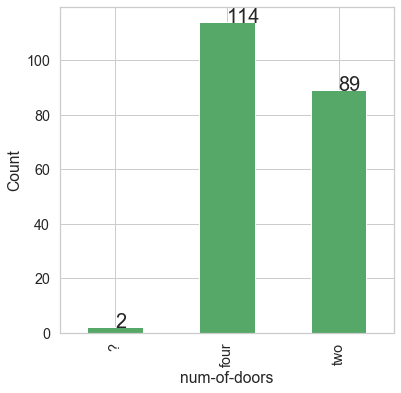

In [97]:
plt.figure(figsize = (6, 6))

doorMode = df.groupby('num-of-doors')['make'].count()
print(type(doorMode))
doorMode.plot(kind='bar', color='g')
plt.ylabel('Count')
for index,Count in enumerate(doorMode):
    plt.text(x=index , y=Count , s=f"{Count}" , fontdict=dict(fontsize=20))

print(doorMode)

In [117]:
numOfDoorsMode = df.loc[df.groupby('num-of-doors')['make'].count().max()]['num-of-doors']
print(numOfDoorsMode + ' : type is ' +  str(type(numOfDoorsMode)))

four : type is <class 'str'>


## Find out colmns which contain special character '?'
Calculate mean for each column if it contain and special character

In [164]:
meanDictList = []
iIndex = 0
df.round(decimals=3)
for lCol in lstColumns:
    meanDict = dict()
    try:
        nlMean = 'null'
        #print('Checking data for %s' % lCol)
        nDf = df[lCol].astype(str)
        #print(nDf)
        #print(nDf.loc[:])
        nlColumnType = nDf[:] == '?'
        nlColumn = nDf[nDf[:] != '?']
        if(nlColumnType.any() != True):
            #print('Continue loop...')
            continue
        #print(nlColumn)
        nlMean = round(nlColumn.astype(str).astype(float).mean(),3)
        #print(' Mean '  + str(nlMean))
    except:
        if(lCol == 'num-of-doors'):
            nlMean = numOfDoorsMode
        else:
            nlMean = nlColumn.astype(str).mode()
        print('Error for ' + lCol + 'nMean = ' + str(nlMean))
        
    meanDict['Column'] = lCol
    meanDict['Mean'] = nlMean
    meanDictList.insert(-1,meanDict)
    #meanDictList[iIndex] = meanDict
    #iIndex = iIndex + 1
print(meanDictList)

Error for num-of-doorsnMean = four
[{'Column': 'num-of-doors', 'Mean': 'four'}, {'Column': 'bore', 'Mean': 3.33}, {'Column': 'stroke', 'Mean': 3.255}, {'Column': 'horsepower', 'Mean': 104.256}, {'Column': 'peak-rpm', 'Mean': 5125.369}, {'Column': 'price', 'Mean': 13207.129}, {'Column': 'normalized-losses', 'Mean': 122.0}]


In [160]:
from rapidtables import format_table, FORMAT_GENERATOR_COLS
from termcolor import colored

In [165]:
def DisplayFormattedData(data):
    header, rows = format_table(data, fmt=FORMAT_GENERATOR_COLS)
    spacer = '  '
    print(colored(spacer.join(header), color='blue'))
    print(colored('-' * sum([(len(x) + 2) for x in header]), color='grey'))
    for r in rows:
        print(colored(r[0], color='white', attrs=['bold']) + spacer, end='')
        print(colored(r[1], color='cyan') + spacer, end='\n')
        
        #print(colored(r[2], color='yellow'))

In [166]:
#for a in meanDict:
#    print('\n Key={}, Value={} '.format(a , meanDict[a]))
DisplayFormattedData(meanDictList)

Column             Mean     
------------------------------
num-of-doors       four       
bore               3.33       
stroke             3.255      
horsepower         104.256    
peak-rpm           5125.369   
price              13207.129  
normalized-losses  122.0      


In [25]:
nlColumn = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlMean = nlColumn.astype(str).astype(int).mean()
nlMean

122.0

### Update data set

In [172]:
for colDictionary in meanDictList:
    
    strColName = colDictionary['Column']
    strValue = colDictionary['Mean']
    try:
        df[strColName] = df[strColName].replace('?',strValue).astype(float)
    except:
        df[strColName] = df[strColName].replace('?',strValue).astype(str)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,13207.129


### Verify data is cleaned for special character

In [178]:
iCheckIndex = 0
for colDictionary in meanDictList:
    strColName = colDictionary['Column']
    strValue = colDictionary['Mean']
    nDf = df[lCol].astype(str)
    #print(nDf)
    #print(nDf.loc[:])
    nlColumnType = nDf[:] == '?'
    nlColumn = nDf[nDf[:] != '?']
    if(nlColumnType.any() == True):
        print('Column {} is not updated'.format(strColName))
    else:
        iCheckIndex = iCheckIndex + 1

if(iCheckIndex == len(meanDictList)):
    print('Data updated accurately')
else:
    print('Data is not updated accurately')


Data updated accurately


### Reverifying data from Automobile data set

In [179]:
import pandas_profiling

### Profiling pass 1

In [183]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df.profile_report(title='Profiling after Data Preprocessing of Automobile dataset')
profile.to_file(output_file="automobile_profiling_after_preprocessing_pass1.html")
#dir(profile)

# To output the pandas profiling report on the notebook.
#df.profile_report(title='Profiling after Data Preprocessing Automobile dataset', style={'full_width':True})

In [189]:
type(profile)

pandas_profiling.__init__.ProfileReport

In [181]:
'''
highway-mpg is dropped as it is higly correlated to city-mpg
'''
dfPostProcess = df.drop('highway-mpg',axis=1)
dfPostProcess.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,17450.0


In [182]:
dfPostProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [190]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile2 = dfPostProcess.profile_report(title='2. Profiling after Data Preprocessing of Automobile dataset')
profile2.to_file(output_file="automobile_profiling_after_preprocessing_pass2.html")

### Observation after 2nd time profiling
1. Column highway-mpg is directly correlated to city-mpg.<br>Hence we will ignore column by dropping it. <p>
2. Symboling column is categorical data, which represents amount of risk for automobile.<p> This warning is ignored. <

### Ready for next step - Data Analysis & Plotting
Initially we had 5 warnings. After data cleaning process we have 1 warning.

<b><u>Initial Warnings</u></b><p>
<table border="1" width="100%" style="margin: 0px;">
<tr align="left"><td>- highway-mpg is highly correlated with city-mpg (ρ = 0.9713370423)</td><td>Rejected</td></tr>
<tr align='left'><td>- horsepower has a high cardinality: 60 distinct values</td><td>Warning</td></tr>
<tr align='left'><td>- normalized-losses has a high cardinality: 52 distinct values</td><td>Warning</td></tr>
<tr align='left'><td>- price has a high cardinality: 187 distinct values</td><td>Warning</td></tr>
<tr align='left'><td>- symboling has 67 (32.7%) zeros</td><td>Zeros</td></tr>
</table>
<p>At this stage after profiling for 2nd time we are ready for Analysis Process. 

<b><u>Final Warning after 2nd Profiling</u></b>
<table align='left' border="1" width="100%" style="margin: 0px;">
<tr align='left'><td>- symboling has 67 (32.7%) zeros</td><td>Zeros</td></tr>
</table>

### Analyzing dataset dfPostProcess

In [191]:
dfPostProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

### Plot Number of Manufacturer by vehicle count

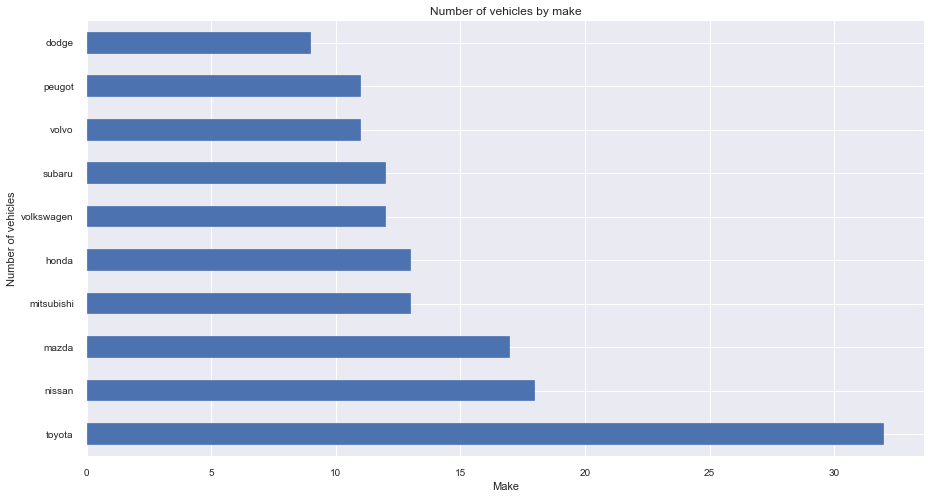

In [240]:
dfPostProcess.make.value_counts().nlargest(10).plot(kind='barh', figsize=(15,8))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Bottom 5 vehicle manufacturer

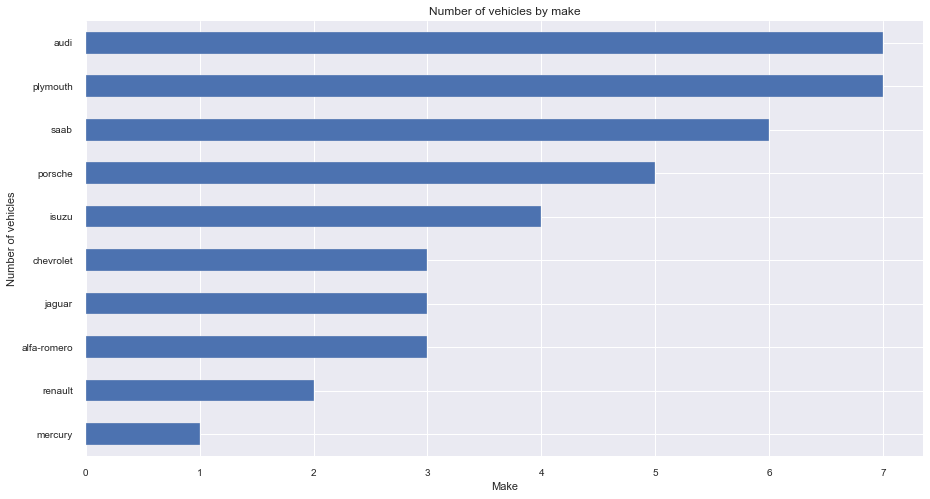

In [245]:
dfPostProcess.make.value_counts().nsmallest(10).plot(kind='barh', figsize=(15,8))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Pie chart for Top 5 manufacturer
Amongst top 5 Toyoto lead with 34.41% market share
<br>Followed by Nissan with 19.35%. 

There is massive % gap between top 2 manufacturers. 

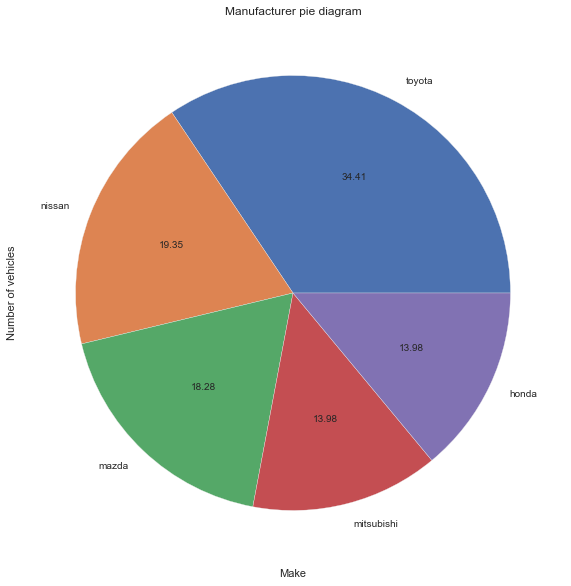

In [249]:
dfPostProcess['make'].value_counts().nlargest(5).plot.pie(figsize=(8, 8), autopct='%.2f')
plt.title("Manufacturer pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Pie chart for Bottom 5 manufacturer

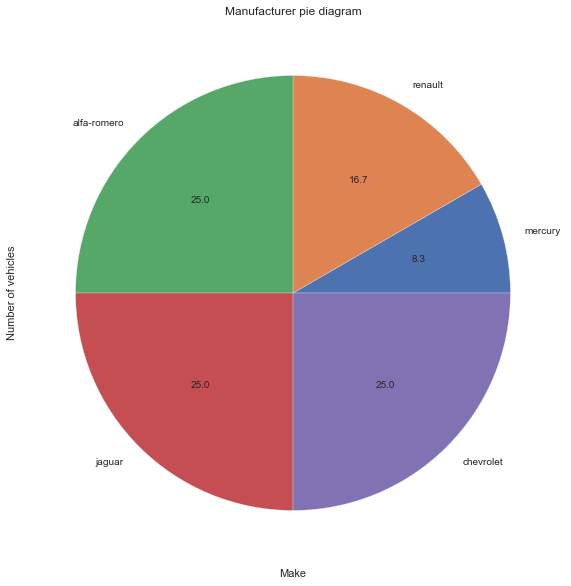

In [250]:
dfPostProcess['make'].value_counts().nsmallest(5).plot.pie(figsize=(10, 10), autopct='%.1f')
plt.title("Manufacturer pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Insurance risk frequency
As seen from below graph Insurance Risk data is Normally distributed.

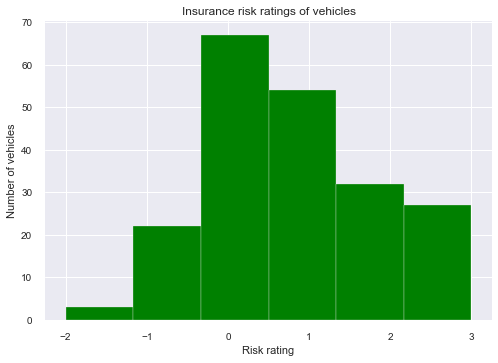

In [225]:
dfPostProcess.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

### Normalized losses histogram chart

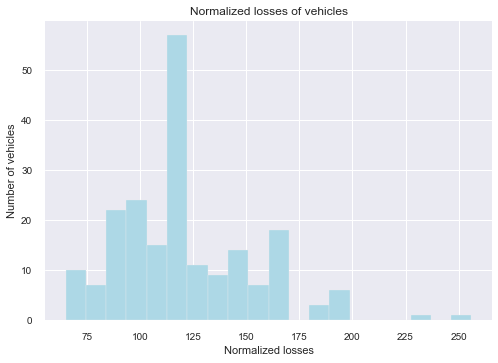

In [237]:
dfPostProcess['normalized-losses'].hist(bins=20,color='lightblue');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

### Fuel type bar chart based on Normalized losses

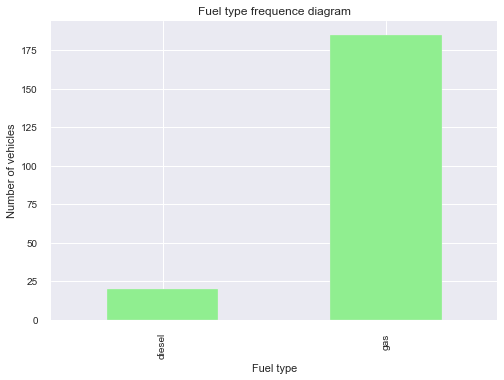

In [333]:
#=dfPostProcess.groupby('fuel-type')['normalized-losses'].any() > 2
#dfNew = dfPostProcess[dfPostProcess['normalized-losses'].values > 100]['fuel-type'].value_counts()
dfPostProcess.groupby('fuel-type')['normalized-losses'].count().plot(kind='bar',color='lightgreen')
#dfNew.plot(kind='bar',color='lightgreen')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Fuel type pie chart

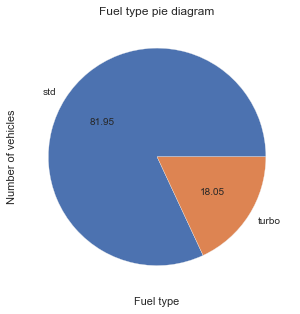

In [257]:
dfPostProcess['aspiration'].value_counts().plot.pie(figsize=(5, 5), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Horse-power histogram for data distrubtion as per standard deviation.

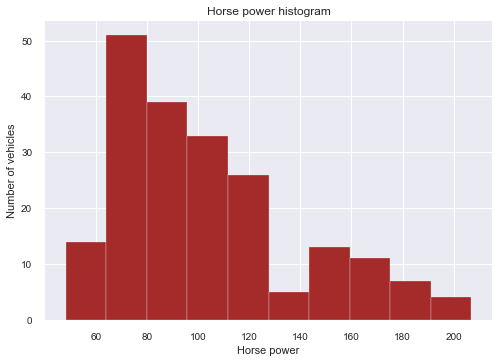

In [264]:
xHorsePower = dfPostProcess.horsepower-dfPostProcess.horsepower.mean()
threeStd = 3*dfPostProcess.horsepower.std()
dfPostProcess.horsepower[np.abs(xHorsePower)<=(threeStd)].hist(bins=10,color='brown');
#dfPostProcess.horsepower.hist(bins=10,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

### Normalized losses against Make

In [287]:
dfPostProcess.groupby('make')['normalized-losses'].max().nlargest(5)

make
volkswagen    256.0
nissan        231.0
toyota        197.0
bmw           192.0
porsche       186.0
Name: normalized-losses, dtype: float64

Text(0.5, 1.0, 'Normalized losses histogram')

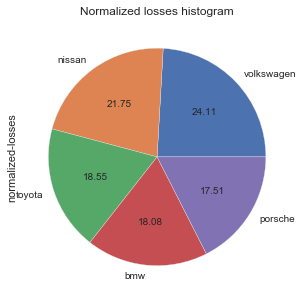

In [285]:
dfPostProcess.groupby('make')['normalized-losses'].max().nlargest(5).plot.pie(figsize=(5, 5), autopct='%.2f')#.hist(bins=5,color='pink');
plt.title("Normalized losses histogram")

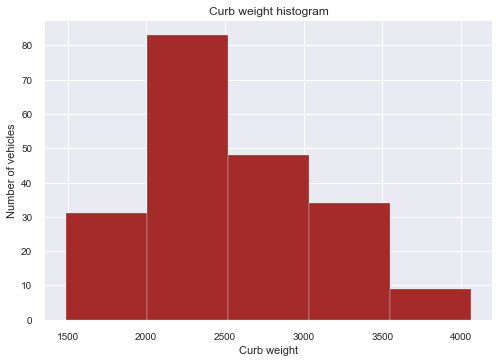

In [334]:
dfPostProcess['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

### Findings
We have taken some key features of the automobile dataset for this analysis and below are our findings. 
1. Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan.
2. Mercury and Renualt are make from bottom with 8.3% and 16.7% respectively. 
3. Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
4. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
5. Curb weight of the cars are distributed between 1500 and 4000 approximately
6. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
7. Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

## Correlation Analysis

Findings: There are some good inferences we can take it from the correlation heat map.
1. Price is more correlated with engine size and curb weight of the car 
2. Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
3. Wheel base is highly correlated with length and width of the car
4. Symboling and normalized car are correlated than the other fields

### Heat map 

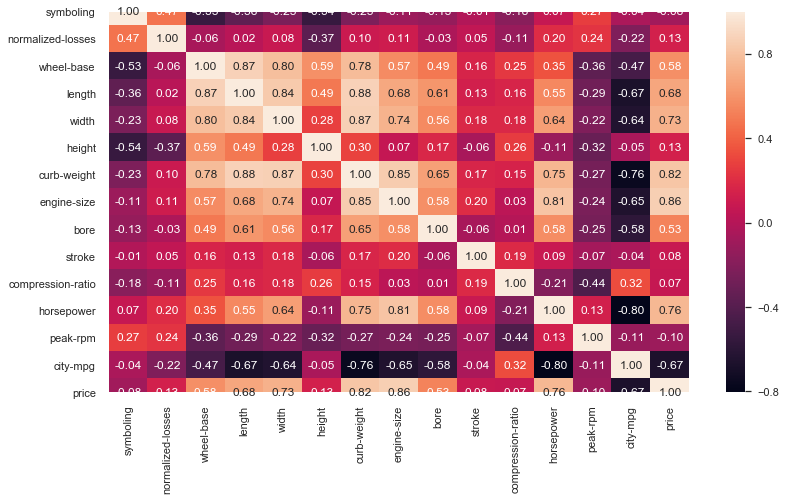

In [336]:
import seaborn as sns
corr = dfPostProcess.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
#rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
#roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Scatter plot of Normalized losses and symboling

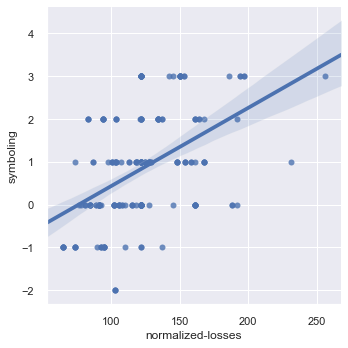

In [338]:
g = sns.lmplot('normalized-losses',"symboling", dfPostProcess);

### Drive wheel Vs City MPG

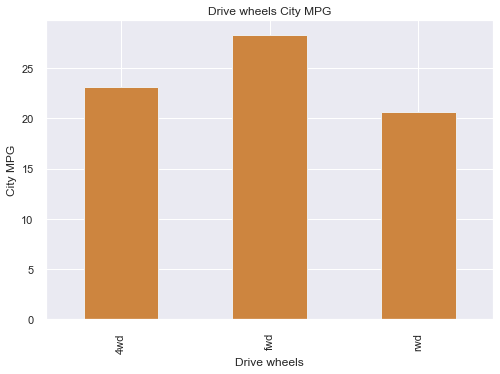

In [339]:
dfPostProcess.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

### Make Vs City milege

Text(0.5, 0, 'Make')

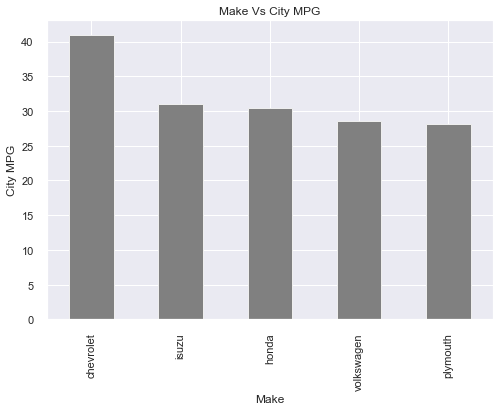

In [351]:
dfPostProcess.groupby('make')['city-mpg'].mean().nlargest(5).plot(kind='bar' , color = 'gray');
plt.title("Make Vs City MPG")
plt.ylabel('City MPG')
plt.xlabel('Make')

### Normalized losses based on body style and no. of doors

Findings: <br>
As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. <br>Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

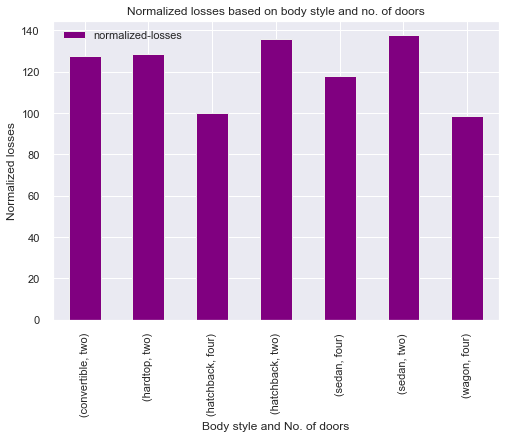

In [353]:
pd.pivot_table(dfPostProcess,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

## Conclusion

Analysis of the data set provides 

- How the data set are distributed
- Correlation between different fields and how they are related
- Normalized loss of the manufacturer 
- Symboling : Cars are initially assigned a risk factor symbol associated with its price
- Mileage : Mileage based on City and Highway driving for various make and attributes
- Price : Factors affecting Price of the Automobile.
- Importance of drive wheels and curb weight